# BUSI/COMP 488-003 Final Project

## Graduate Hotels Online Reviews

Group 5: Avi Agrawal, Reed Dickerson, Izzy Parrett, Shivram Ramkumar, Nora Xia, Natalie Yuziuk

## Scenario
Graduate Hotels is a hand-crafted collection of hotels located in college towns across the country, launched in 2014 by Nashville-based real estate company Adventurous Journeys Capital Partners. The unique positioning of Graduate Hotels is one of their strengths. Might it also be a weakness?

## Stakeholders
This analysis is addressed to the executive management of Graduate Hotels, the primary stakeholders.

## Question
* We know that reviews are influential in deciding whether people stay at hotels. Many people trust customer reviews and are influenced to stay or choose a different hotel because of them (https://hospitalityfan.com/9-online-review-statistics/). 
* We also need to keep in mind that, though these reviews are influential, they are not necessarily indicative of fact or truth. There is likely to be a sampling bias of people who choose to answer reviews - those who had a good experience and those with negative ones. Issues highlighted by these reviews may indicate ways to improve service but may not be representative of major issues.
* Considering the millions of visitors over the years, reviews are posted by a tiny percentage of people. A good idea would be to incentivize or encourage reviews, perhaps with check-out souvenirs like a card with candy (https://www.criton.com/news-hub/7-best-practices-to-ensure-positive-hotel-guest-reviews/) with a QR code to add a review. This may encourage a better and more positive depiction of the "truth" in reviews.
* Considering all this and the available data, our question is: **what are the strengths and weaknesses of Graduate Hotels, and how do different branches compare?** This can help define insights such as what procedures different branches can adopt.

## Begin Colab execution of parsing reviews
Start with the setup of importing the relevant scraped reviews.

In [ ]:
# mount your google drive to access data IF WORKING in COLAB
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import altair as alt

In [ ]:
# use your own file path to load in json file
file_path = '/content/drive' + \
            '/MyDrive/BUSI488/FinalProject/GraduateHotels_google.json' # enter file path here, with the provided log file unaltered
google = pd.read_json(file_path, lines=True)

In [ ]:
# see what a review looks like
google.head()

,Unnamed: 0,ID,hotel,name,time,rating,site,trip type,room rating,location rating,service rating,text,hotel reply,reply date,timestamp
0,"{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': ...","{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': ...","{'0': 'Graduate Ann Arbor', '1': 'Graduate Ann...","{'0': 'James Burkhardt', '1': 'Ty', '2': 'Meli...","{'0': '3 weeks ago', '1': '2 months ago', '2':...","{'0': '3/5', '1': '5/10', '2': '5/5', '3': '2/...","{'0': 'Google', '1': 'Priceline', '2': 'Google...","{'0': 'Couple', '1': None, '2': None, '3': Non...","{'0': 4.0, '1': None, '2': 5.0, '3': None, '4'...","{'0': 5.0, '1': None, '2': 5.0, '3': None, '4'...","{'0': 3.0, '1': None, '2': 5.0, '3': None, '4'...",{'0': 'Graduate inn gets a 3/5 stars. Air cond...,"{'0': None, '1': None, '2': None, '3': None, '...","{'0': None, '1': None, '2': None, '3': None, '...","{'0': '2022-04-04 00:36:24.051817', '1': '2022..."


In [ ]:
# create a function that converts the scraped data into a proper DataFrame
def parse_reviews(data):
  df = pd.DataFrame()
  for index in data.columns:
    col = pd.DataFrame.from_dict(data[index][0], orient='index', columns=[index])
    df = pd.concat([df, col], axis=1)
  return df

In [ ]:
reviews = parse_reviews(google)
reviews.head()

,Unnamed: 0,ID,hotel,name,time,rating,site,trip type,room rating,location rating,service rating,text,hotel reply,reply date,timestamp
0,0,0,Graduate Ann Arbor,James Burkhardt,3 weeks ago,3/5,Google,Couple,4.0,5.0,3.0,Graduate inn gets a 3/5 stars. Air conditionin...,None,None,2022-04-04 00:36:24.051817
1,1,1,Graduate Ann Arbor,Ty,2 months ago,5/10,Priceline,None,NaN,NaN,NaN,+Taking an old hotel and modernizing it by way...,None,None,2022-04-04 00:36:24.051817
2,2,2,Graduate Ann Arbor,Melissa Mayer,2 months ago,5/5,Google,None,5.0,5.0,5.0,Everything was wonderful! Very unique hotel. O...,None,None,2022-04-04 00:36:24.051817
3,3,3,Graduate Ann Arbor,Verified Hotel Guest,3 months ago,2/10,Priceline,None,NaN,NaN,NaN,+The location near downtown was convenient. -W...,None,None,2022-04-04 00:36:24.051817
4,4,4,Graduate Ann Arbor,Clinton,5 months ago,10/10,Priceline,None,NaN,NaN,NaN,+The staff was very friendly and the location ...,None,None,2022-04-04 00:36:24.051817


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20957 entries, 0 to 20956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20957 non-null  int64  
 1   ID               20957 non-null  int64  
 2   hotel            20957 non-null  object 
 3   name             20957 non-null  object 
 4   time             20957 non-null  object 
 5   rating           20957 non-null  object 
 6   site             20957 non-null  object 
 7   trip type        1235 non-null   object 
 8   room rating      1092 non-null   float64
 9   location rating  1115 non-null   float64
 10  service rating   1158 non-null   float64
 11  text             14251 non-null  object 
 12  hotel reply      8905 non-null   object 
 13  reply date       8905 non-null   object 
 14  timestamp        20957 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.6+ MB


In [ ]:
# the unnamed: 0, ID, and timestamp are unnecessary
reviews.drop(['Unnamed: 0', 'ID', 'timestamp'], axis=1, inplace=True)

In [ ]:
# convert to categorical to save space
reviews['hotel'] = reviews['hotel'].astype('category')
reviews['time'] = reviews['time'].astype('category')
reviews['site'] = reviews['site'].astype('category')
reviews['trip type'] = reviews['trip type'].astype('category')
reviews['text'] = reviews['text'].astype('string')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20957 entries, 0 to 20956
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   hotel            20957 non-null  category
 1   name             20957 non-null  object  
 2   time             20957 non-null  category
 3   rating           20957 non-null  object  
 4   site             20957 non-null  category
 5   trip type        1235 non-null   category
 6   room rating      1092 non-null   float64 
 7   location rating  1115 non-null   float64 
 8   service rating   1158 non-null   float64 
 9   text             14251 non-null  string  
 10  hotel reply      8905 non-null   object  
 11  reply date       8905 non-null   object  
dtypes: category(4), float64(3), object(4), string(1)
memory usage: 1.5+ MB


In [ ]:
# how many reviews are there per branch?
reviews['hotel'].value_counts()

Graduate Providence                       1751
Graduate Minneapolis                      1747
Graduate Eugene                           1454
Graduate Cambridge                        1338
Graduate Lincoln                          1154
Graduate Richmond                         1100
Graduate Annapolis                        1060
Graduate Cincinnati                       1056
Graduate Ann Arbor                         948
The Randolph Hotel, by Graduate Hotels     939
Graduate Tempe                             882
Graduate Athens                            798
Graduate Charlottesville                   739
Graduate Knoxville                         637
Graduate Berkeley                          595
Graduate Oxford                            561
Graduate Iowa City                         505
Graduate Seattle                           449
Graduate Madison                           426
Graduate Nashville                         381
Graduate Bloomington                       324
Graduate Chap

## Clean Reviews Database for Vader Sentiment Analysis
### This section will provide a proof of concept for our later analysis and reveals insights about the nature of the scraped reviews
Reviews can contain a range of characters, words, and strings that do not add value to our analysis. 

In [ ]:
reviews.text.head()

0    Graduate inn gets a 3/5 stars. Air conditionin...
1    +Taking an old hotel and modernizing it by way...
2    Everything was wonderful! Very unique hotel. O...
3    +The location near downtown was convenient. -W...
4    +The staff was very friendly and the location ...
Name: text, dtype: string

In [ ]:
print([w for w in reviews.text])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# import regular expressions
import re

# set-up patterns to be removed from the tweets
pat1 = r"http\S+"   # web links
pat2 = r"#"         # hashtags  
pat3 = r"@"         # mentions
pat4 = r"FAV"       # twitter reserved abbreviation
pat5 = r"RE"        # twitter reserved abbreviation
pat6 = r"pic.\S+"   # twitter links to images
pat7 = r"\n"        # line breaks
pat8 = '\r\n'       # line breaks
pat9 = r'|'.join((r'&amp;',r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;'))  # HTML tags

# combine all patterns
combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6, pat7, pat8, pat9))

# replace the patterns with an empty string
reviews['stripped'] =  [re.sub(combined_pat, '', str(w)) for w in reviews.text]

# might have double spaces now (because of empty string replacements above) - remove double empty spaces
reviews['stripped'] = reviews.stripped.replace({' +':' '},regex=True)

# print some tweets to check if it worked
for i in range(0,10):
    print(reviews.stripped[i])
    print('\n')

Graduate inn gets a 3/5 stars. Air conditioning wasn’t working, charged my a card a no show fee for the day after my stay, and almost impossible to reach them through the phone. Tyrone gets a 5/5 stars. He understood what I was going through and put the extra effort in and got everything solved for me!


+Taking an old hotel and modernizing it by way of academics was quaint and made you feel as a part of the university. -There is no on site parking so it's either $30 for valley or walk several blocks away. For someone who has a balance disorder, didn't sit right with me. We had to opt for valet. Our room wasn't spotless as there were coffee stations on the tile floor


Everything was wonderful! Very unique hotel. Only thing it did very warm in our room, luckily they had a fan to use!


+The location near downtown was convenient. -We arrived at 4:15 (check in is at 4) only to be told they had no rooms clean and no estimate for when they would be. They said they would text us when a room

In [ ]:
# import Vader sentiment analyzer
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# instantiate the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# get the compound sentiment score for each tweet
reviews['C_Score'] = np.nan # initialize empty comlumn in our tweets dataframe (empty = missing values)
for index, row in reviews.iterrows():  # loop through all tweets (i.e., rows)
    reviews.loc[index, 'C_Score'] = analyzer.polarity_scores(row['stripped'])['compound']

# let's take a look!
pd.set_option('display.max_colwidth', None)
reviews[['stripped','C_Score']][300:310]

,stripped,C_Score
300,"Great rooms, nice decor, easy access to downtown Ann Arbor.",0.8689
301,Small rooms. Good location. Average food. Nice staff.,0.6908
302,"Excellent hotel with good service, nice rooms with a cute theme, good bar downstairs, good location.",0.9531
303,"Eh, style over comfort. Not a terrible hotel, but also not a great experience.",-0.4430
304,A cool looking hotel interior...hard beds..didn't like the the dual pull out bathroom doors and lack of fan in bathroom..bathroom had an moldy odor..obnoxious parking policy and equally obnoxious valets,-0.4234
305,"Excellent hotel, classy feel with tremendous location, easy-to-find street parking, and friendly staff.",0.8689
306,"The dog thing is out of control. I don’t want to eat with dogs. There’s a friggin dog in the bar! It’s also against the law in Michigan. Graduate, get the dogs under control.",0.1511
307,Beautiful interior. Friendly staff. Loved the room.. Excellent appointments in the room.,0.9403
308,Very nice and maintained well. Plenty to see and do in the area and easily within walking distance.,0.7645
309,"Beautiful hotel, very unique decor and very clean. Everything you are looking for in a nice hotel",0.8655


In [ ]:
# most reviews are on Google's site, very few relatively from other sites
reviews['site'].value_counts()

Google           20267
Priceline          620
Trip.com            63
ZenHotels.com        7
Name: site, dtype: int64

In [ ]:
# drop reviews not part of Google's site
reviews = reviews[reviews['site'] == 'Google']

In [ ]:
reviews['ratingInt'] = reviews['rating'].apply(lambda x: x[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
reviews['ratingInt'] = reviews['ratingInt'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print("Number of poorly rated reviews but high sentiment:", 
      len(reviews[(reviews['C_Score'] >= 0.1) & (reviews['ratingInt'] <= 2)]))
print("Number of overall review:", len(reviews))
print("Percent of inaccurate sentiment:", 
      len(reviews[(reviews['C_Score'] >= 0.1) & (reviews['ratingInt'] <= 2)])/len(reviews)*100)
# therefore we can use sentiment analysis as a good metric for accurately gauging sentiment

Number of poorly rated reviews but high sentiment: 535
Number of overall review: 20267
Percent of inaccurate sentiment: 2.6397592144866038


In [ ]:
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<55} {}".format(sentence, str(score)), "\n")

In [ ]:
print(f"Count positive tweets: {sum(reviews['C_Score'] > 0.05)}")
print(f"Count netural tweets: {reviews['C_Score'].between(-0.05, 0.05).sum()}")
print(f"Count negative tweets: {sum(reviews['C_Score'] < -0.05)}")
print(f"Total number of tweets: {reviews['C_Score'].count()}")
print()      

display(reviews.C_Score.describe())

Count positive tweets: 11642
Count netural tweets: 7384
Count negative tweets: 1241
Total number of tweets: 20267



count    20267.000000
mean         0.388773
std          0.454089
min         -0.992200
25%          0.000000
50%          0.440400
75%          0.831600
max          0.999200
Name: C_Score, dtype: float64

In [ ]:
# very similar to distribution of sentiment analysis
print(reviews['ratingInt'].value_counts())

5    11458
4     5337
3     1778
1      953
2      741
Name: ratingInt, dtype: int64


In [ ]:
reviews['Sentiment'] = np.nan

# loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in reviews.iterrows(): 
    if reviews.loc[index, 'C_Score'] > 0.05 : 
            reviews.loc[index, 'Sentiment'] = "Positive"       
    elif reviews.loc[index, 'C_Score'] < -0.05 :
            reviews.loc[index, 'Sentiment'] = "Negative"   
    else : 
        reviews.loc[index, 'Sentiment'] = "Neutral"

# typecast as categorical variable (computationally more efficient)
reviews['Sentiment'] = reviews['Sentiment'].astype("category")

In [ ]:
def sentiment_graph(df):
  # set font size
  plt.rcParams['font.size']=24

  # define figure
  fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

  # get count by sentiment category from tweets_df
  sentiment_counts = df.Sentiment.value_counts()
  labels = sentiment_counts.index

  # define colors
  color_palette_list = ['lightgreen', 'lightblue', 'red']

  # generate graph components
  wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
        colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

  # plot wedges
  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                  horizontalalignment=horizontalalignment)
  # set title
  ax.set_title("Sentiment Distribution", y=.95, fontsize = 24)

  # show Doughnut Chart
  plt.show()

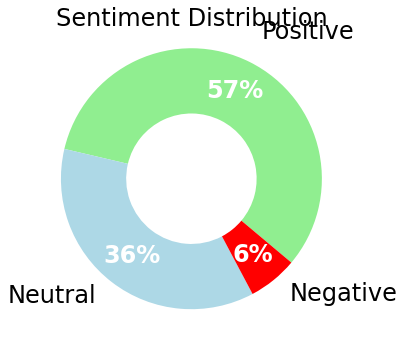

In [ ]:
sentiment_graph(reviews)

Graduate Ann Arbor


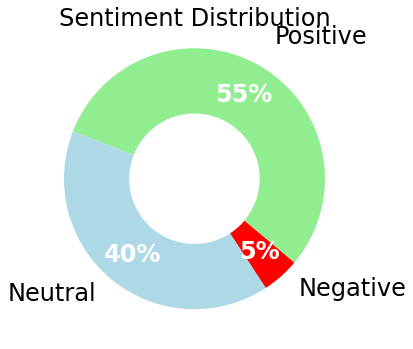




Graduate Annapolis


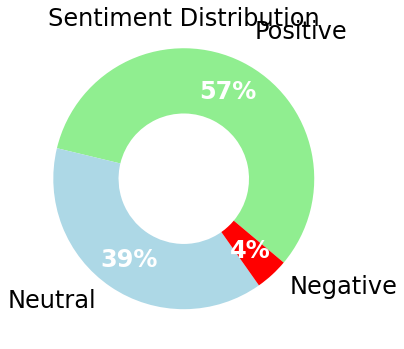




Graduate Athens


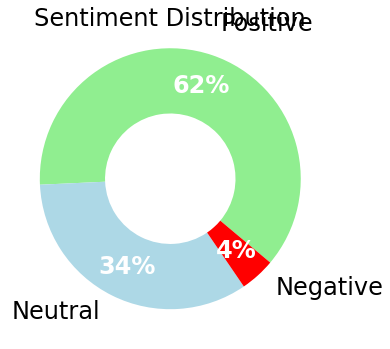




Graduate Berkeley


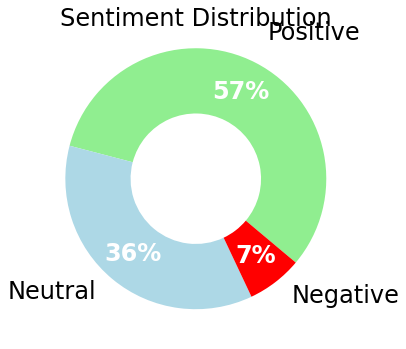




Graduate Bloomington


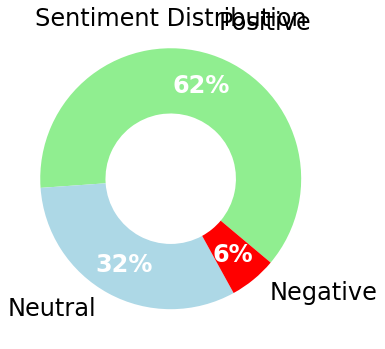




Graduate Cambridge


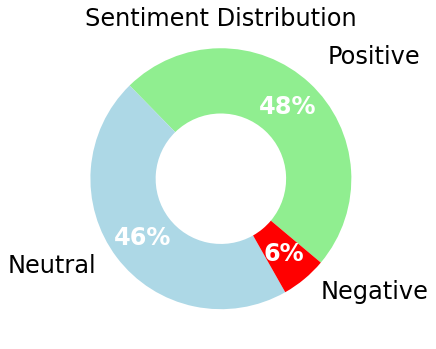




Graduate Chapel Hill


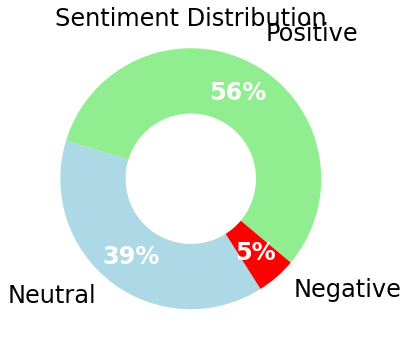




Graduate Charlottesville


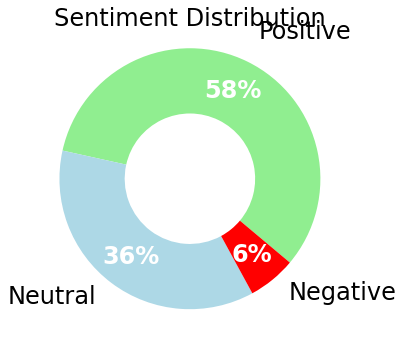




Graduate Cincinnati


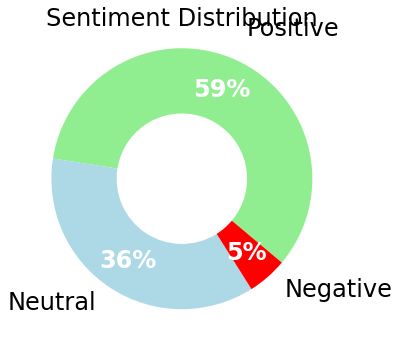




Graduate Columbia, S.C.


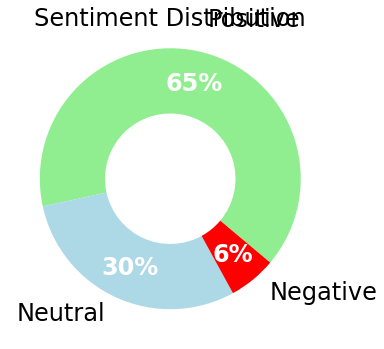




Graduate Columbus


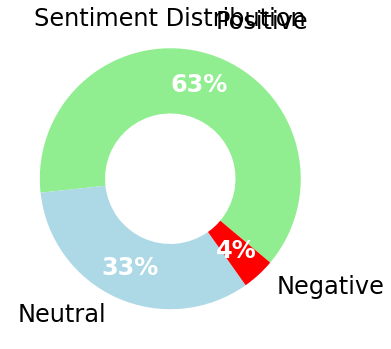




Graduate East Lansing


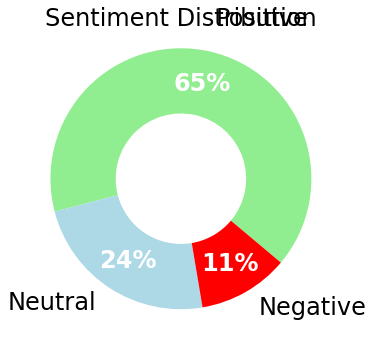




Graduate Eugene


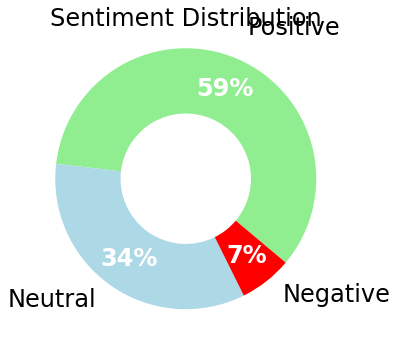




Graduate Evanston


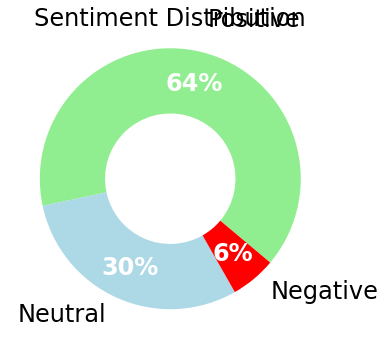




Graduate Fayetteville


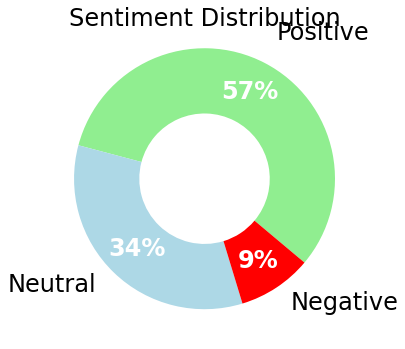




Graduate Iowa City


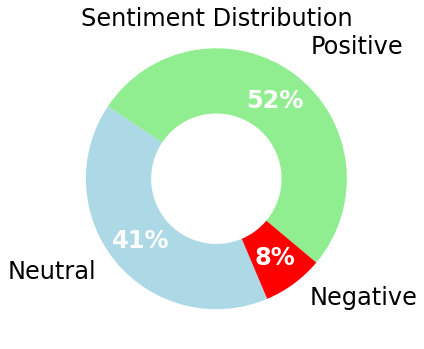




Graduate Knoxville


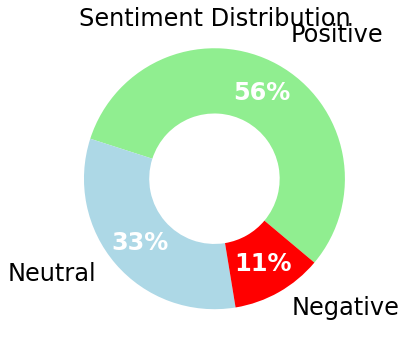




Graduate Lincoln


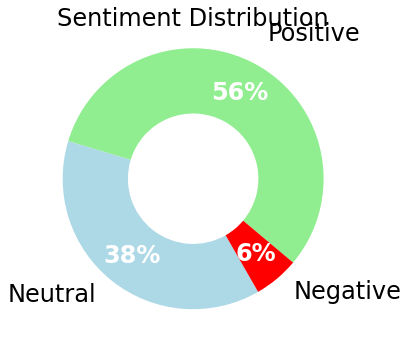




Graduate Madison


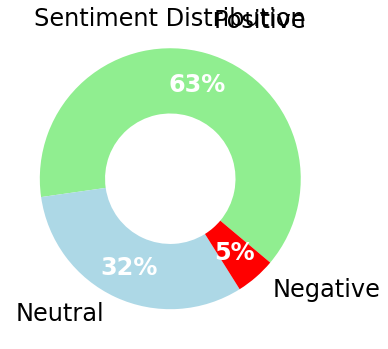




Graduate Minneapolis


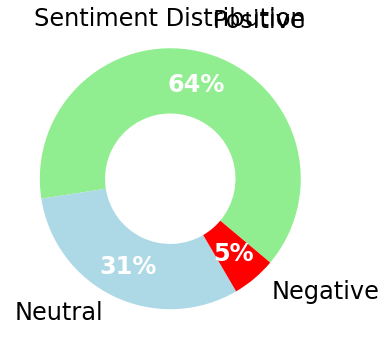




Graduate Nashville


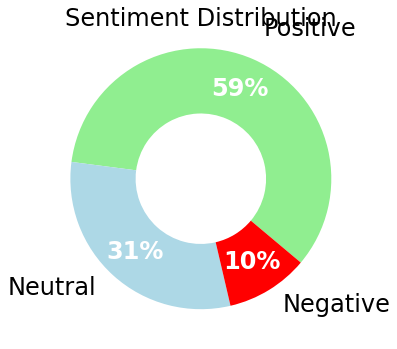




Graduate New Haven


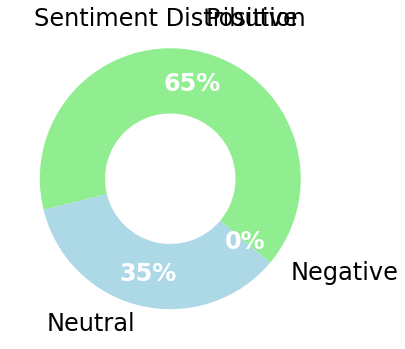




Graduate Oxford


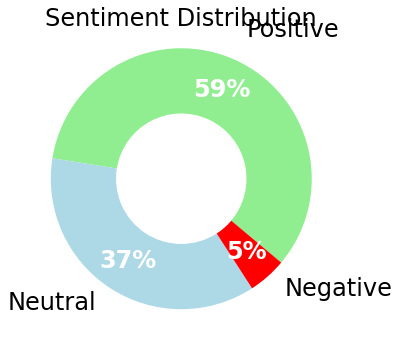




The Randolph Hotel, by Graduate Hotels


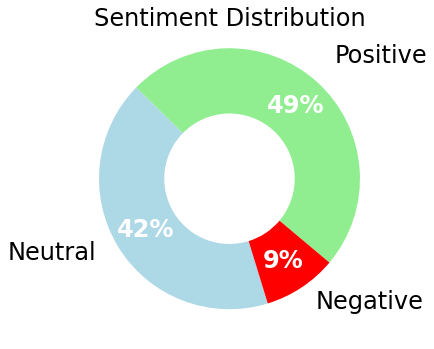




Graduate Providence


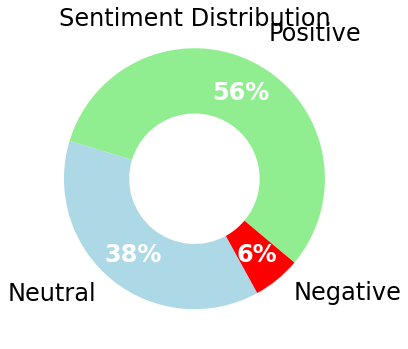




Graduate Richmond


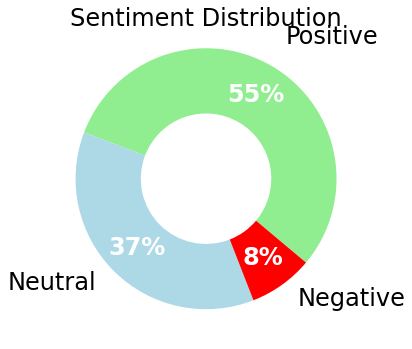




Graduate Roosevelt Island


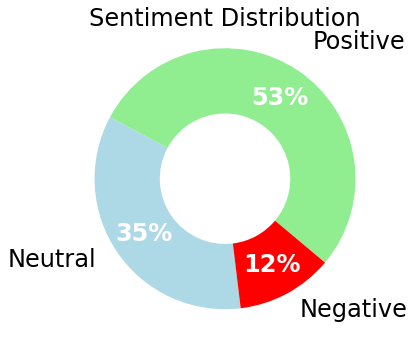




Graduate Seattle


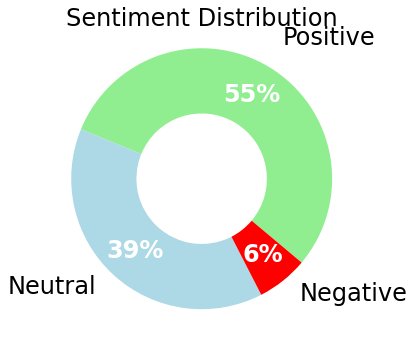




Graduate State College


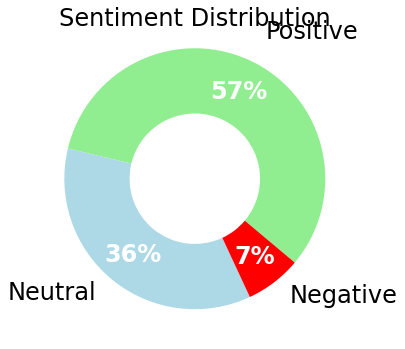




Graduate Storrs


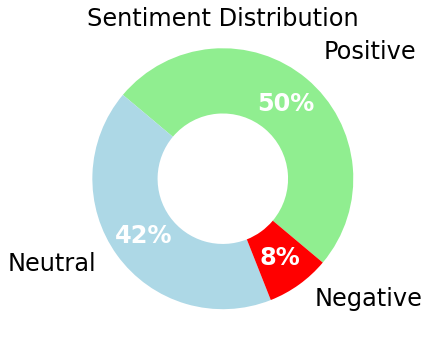




Graduate Tempe


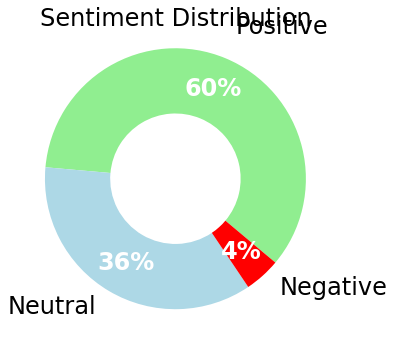




Graduate Tucson


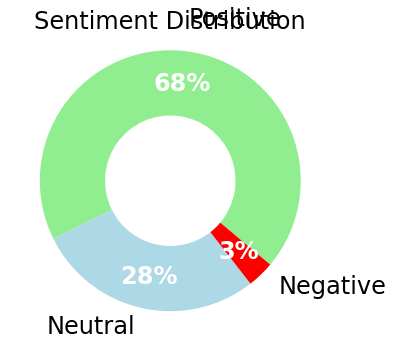

In [ ]:
for hotel in reviews['hotel'].unique():
  print(hotel)
  sentiment_graph(reviews[reviews['hotel'] == hotel])
  print("=======\n\n\n")

In [ ]:
def rating_graph(df):
  # set font size
  plt.rcParams['font.size']=20

  # define figure
  fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

  # get count by sentiment category from tweets_df
  sentiment_counts = df.ratingInt.value_counts()
  labels = sentiment_counts.index

  # define colors
  color_palette_list = ['lightgreen', 'lightblue', 'red', 'darkblue', 'orange', 'darkgreen']

  # generate graph components
  wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
        colors=color_palette_list[0:5], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

  # plot wedges
  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                  horizontalalignment=horizontalalignment)
  # set title
  ax.set_title("Rating Distribution", y=.95, fontsize = 24)

  # show Doughnut Chart
  plt.show()

Graduate Ann Arbor


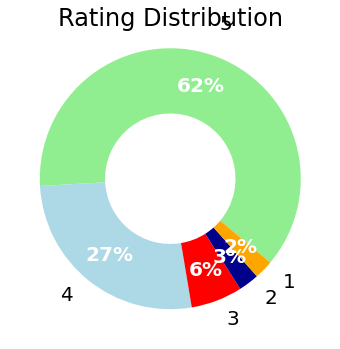




Graduate Annapolis


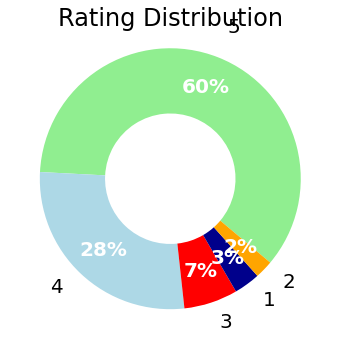




Graduate Athens


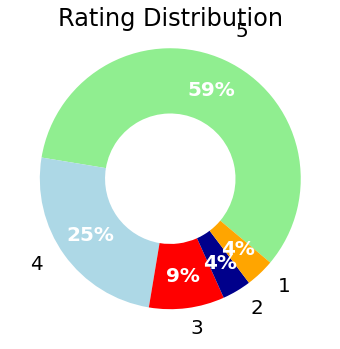




Graduate Berkeley


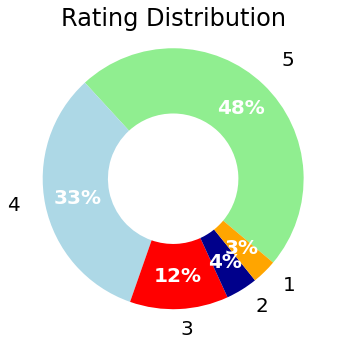




Graduate Bloomington


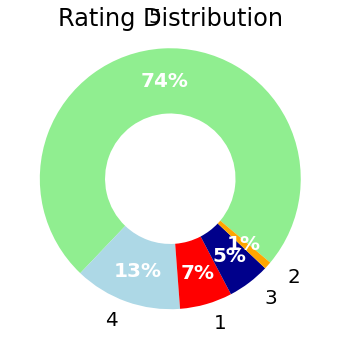




Graduate Cambridge


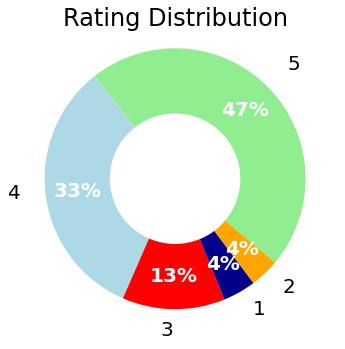




Graduate Chapel Hill


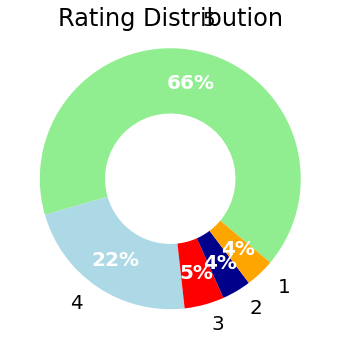




Graduate Charlottesville


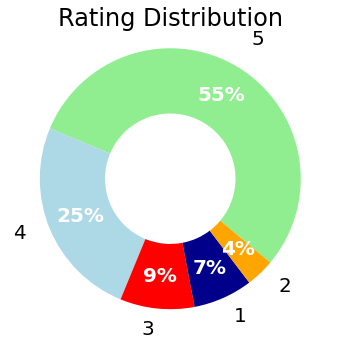




Graduate Cincinnati


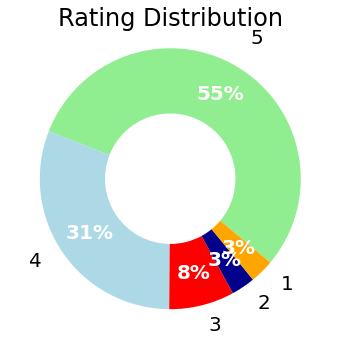




Graduate Columbia, S.C.


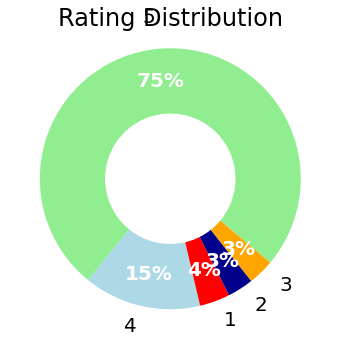




Graduate Columbus


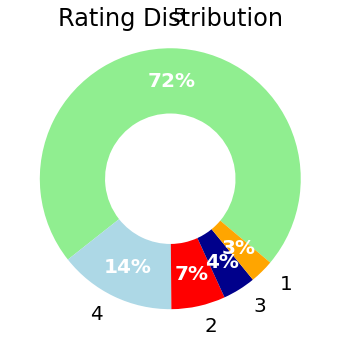




Graduate East Lansing


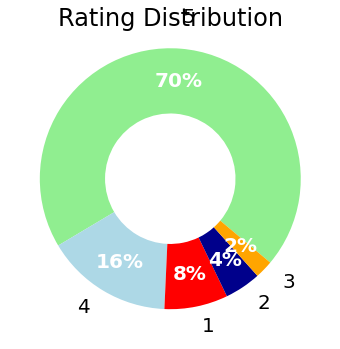




Graduate Eugene


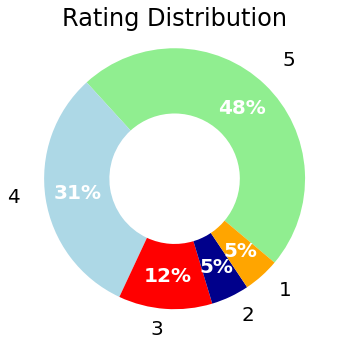




Graduate Evanston


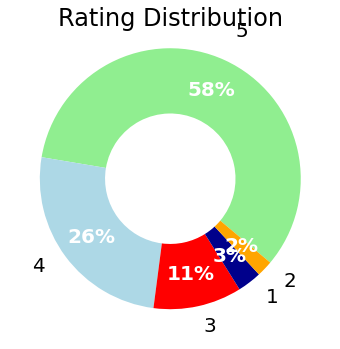




Graduate Fayetteville


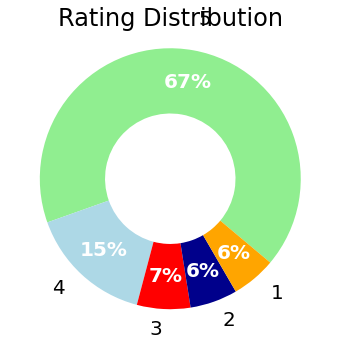




Graduate Iowa City


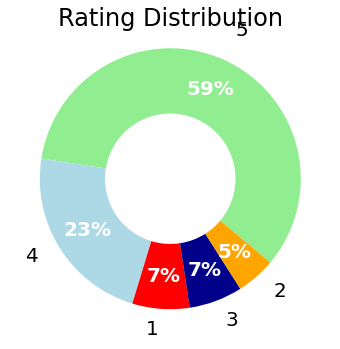




Graduate Knoxville


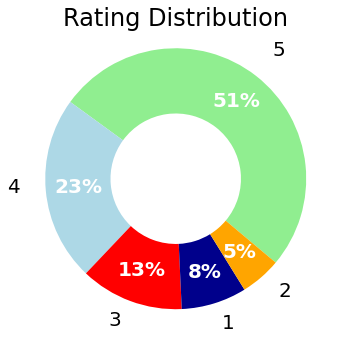




Graduate Lincoln


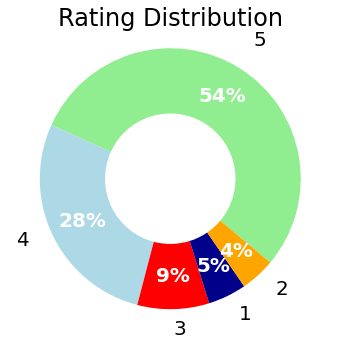




Graduate Madison


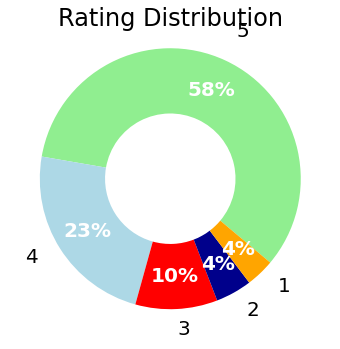




Graduate Minneapolis


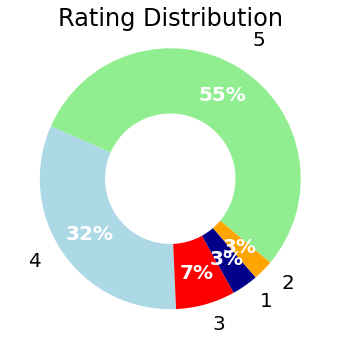




Graduate Nashville


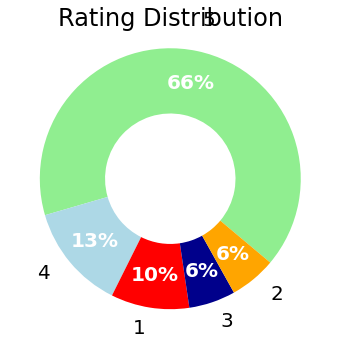




Graduate New Haven


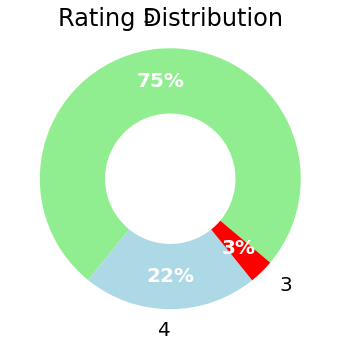




Graduate Oxford


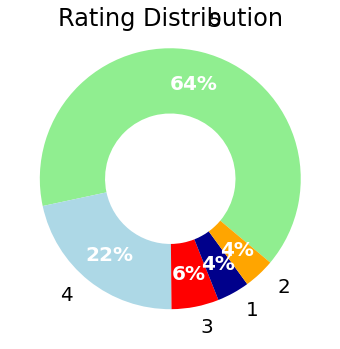




The Randolph Hotel, by Graduate Hotels


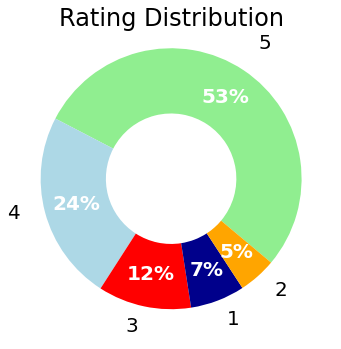




Graduate Providence


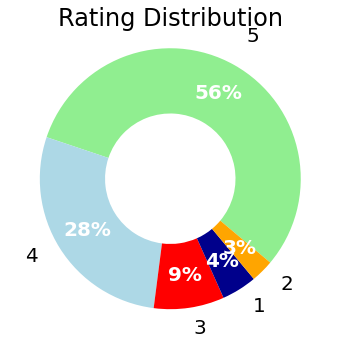




Graduate Richmond


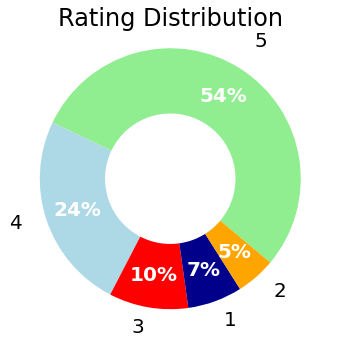




Graduate Roosevelt Island


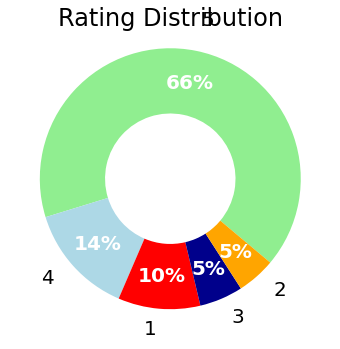




Graduate Seattle


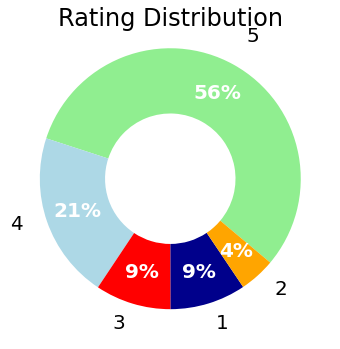




Graduate State College


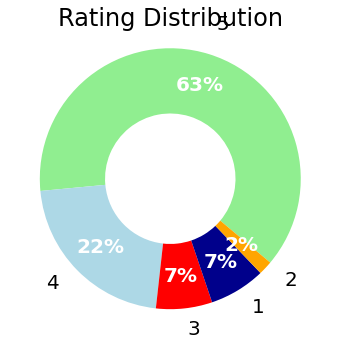




Graduate Storrs


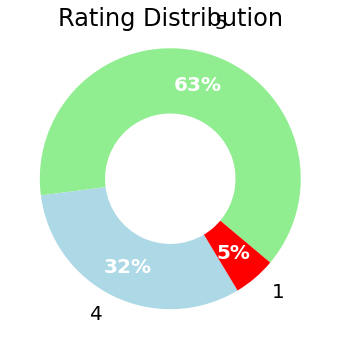




Graduate Tempe


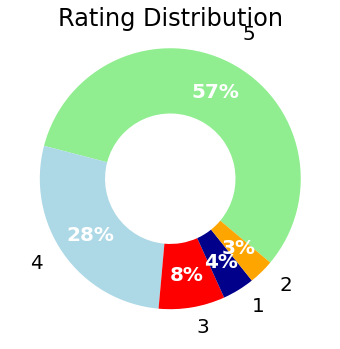




Graduate Tucson


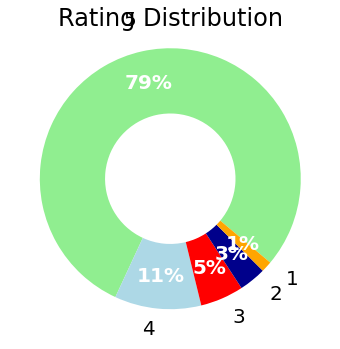

In [ ]:
for hotel in reviews['hotel'].unique():
  print(hotel)
  rating_graph(reviews[reviews['hotel'] == hotel])
  print("=======\n\n\n")

In [ ]:
# clean the reviews
htmlents = r'|'.join((r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;')) 
reviews2 = reviews[reviews['text'].notna()]
reviews2.textclean = reviews2.text.replace(
    {htmlents:'',       # remove html punctuation codes
     '#|@|—|-|\+':'',          # remove hashtag # and reference @ and –/-, leaving tags (unless preprocessor removed already)
     '&amp;':' and ',   # &amp; to and
     '\n|\t':' '}, regex=True) # strip HTMLentries, hash tag markers, reference @, newlines
reviews2['text2'] = reviews2.text.str.strip().replace({' +':' '},regex=True) # collapse extra spaces
# check our Work
reviews2['text2'].tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


20908                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
# import libraries to tokenize and eventually identify keywords
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
reviews2.head()

,hotel,name,time,rating,site,trip type,room rating,location rating,service rating,text,hotel reply,reply date,stripped,C_Score,ratingInt,Sentiment,text2
0,Graduate Ann Arbor,James Burkhardt,3 weeks ago,3/5,Google,Couple,4.0,5.0,3.0,"Graduate inn gets a 3/5 stars. Air conditioning wasn’t working, charged my a card a no show fee for the day after my stay, and almost impossible to reach them through the phone. Tyrone gets a 5/5 stars. He understood what I was going through and put the extra effort in and got everything solved for me!",None,None,"Graduate inn gets a 3/5 stars. Air conditioning wasn’t working, charged my a card a no show fee for the day after my stay, and almost impossible to reach them through the phone. Tyrone gets a 5/5 stars. He understood what I was going through and put the extra effort in and got everything solved for me!",-0.3304,3,Negative,"Graduate inn gets a 3/5 stars. Air conditioning wasn’t working, charged my a card a no show fee for the day after my stay, and almost impossible to reach them through the phone. Tyrone gets a 5/5 stars. He understood what I was going through and put the extra effort in and got everything solved for me!"
2,Graduate Ann Arbor,Melissa Mayer,2 months ago,5/5,Google,NaN,5.0,5.0,5.0,"Everything was wonderful! Very unique hotel. Only thing it did very warm in our room, luckily they had a fan to use!",None,None,"Everything was wonderful! Very unique hotel. Only thing it did very warm in our room, luckily they had a fan to use!",0.9017,5,Positive,"Everything was wonderful! Very unique hotel. Only thing it did very warm in our room, luckily they had a fan to use!"
5,Graduate Ann Arbor,Ethan S,2 months ago,5/5,Google,NaN,NaN,NaN,NaN,Great stay. Extremely friendly staff who allowed us to check in early with no additional fees. 100% would stay again!,None,None,Great stay. Extremely friendly staff who allowed us to check in early with no additional fees. 100% would stay again!,0.7707,5,Positive,Great stay. Extremely friendly staff who allowed us to check in early with no additional fees. 100% would stay again!
6,Graduate Ann Arbor,Brian Rutherford,a week ago,5/5,Google,NaN,NaN,NaN,NaN,Hotel and staff were great. Thank you for the friendly service. Valet was the only option for parking which is disappointing but the valet staff were quick and friendly.,None,None,Hotel and staff were great. Thank you for the friendly service. Valet was the only option for parking which is disappointing but the valet staff were quick and friendly.,0.8225,5,Positive,Hotel and staff were great. Thank you for the friendly service. Valet was the only option for parking which is disappointing but the valet staff were quick and friendly.
7,Graduate Ann Arbor,Jeff C,3 months ago,1/5,Google,NaN,NaN,NaN,NaN,"Booked this a week ago. Went to check in only to be told power will be cut off at 10am and they will call me at 9am to ""check on us"". How is it they didn't make us aware of this beforehold? Had to last minute book another hotel that has none of the amenities I expected and I paid even more for it! What a crock. Overheard the other desk clerk tell the poor old man next to me that he and his wife can't check in because their room is not ready yet. She said there's a lot of nice shops they can visit. It's 20* outside! Who runs this place?",None,None,"Booked this a week ago. Went to check in only to be told power will be cut off at 10am and they will call me at 9am to ""check on us"". How is it they didn't make us aware of this beforehold? Had to last minute book another hotel that has none of the amenities I expected and I paid even more for it! What a crock. Overheard the other desk clerk tell the poor old man next to me that he and his wife can't check in because their room is not ready yet. She said there's a lot of nice shops they can visit. It's 20* outside! Who runs this place?",-0.6656,1,Negative,"Booked this a week ago. Went to check in only to be told power will be cut off at 10am and they will call 

In [ ]:
reviews2['tokenized'] = reviews2['text2'].apply(word_tokenize)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# eliminate stop words that are meaningless and clutter the tweets
nltk.download('stopwords')
nltk.download('wordnet')
reviews2['tokenized'] = reviews2['tokenized'].apply(lambda x: [t.lower() for t in x])
reviews2['tokenized'] = reviews2['tokenized'].apply(lambda tokens: [t for t in tokens if t not in stopwords.words('english')])
reviews2['tokenized'] = reviews2['tokenized'].apply(lambda tokens: [w for w in tokens if w.isalpha()])

# lemmatize the Tweets
from nltk.stem import WordNetLemmatizer
le = WordNetLemmatizer()
reviews2['lemmatized'] = reviews2['tokenized'].apply(lambda tokens: [le.lemmatize(w) for w in tokens])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
reviews2['tokenized'].tail(10)

20908                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [great]
20909                                                                                                                                                                                                                          

In [ ]:
from nltk.util import bigrams

In [ ]:
list(bigrams(word_tokenize("try a string")))

[('try', 'a'), ('a', 'string')]

In [ ]:
reviews3 = reviews2[reviews2['lemmatized'].str.len() != 0]

In [ ]:
t = list(reviews3['lemmatized'].apply(bigrams).apply(list))
flat_list = [item for sublist in t for item in sublist]

In [ ]:
bigramdf = pd.DataFrame()

In [ ]:
indices = pd.DataFrame(flat_list).value_counts().index.to_list()
indices_df = pd.DataFrame(indices)
values_df = pd.DataFrame(pd.DataFrame(flat_list).value_counts().values)
concat = pd.concat([indices_df, values_df], axis=1)

In [ ]:
concat.columns = ['word1', 'word2', 'num']
concat

,word1,word2,num
0,front,desk,723
1,great,location,625
2,friendly,staff,533
3,nice,hotel,453
4,staff,friendly,426
...,...,...,...
132511,give,son,1
132512,give,shout,1
132513,give,shot,1
132514,give,service,1


In [ ]:
concat['words'] = concat['word1'] + ', ' + concat['word2']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

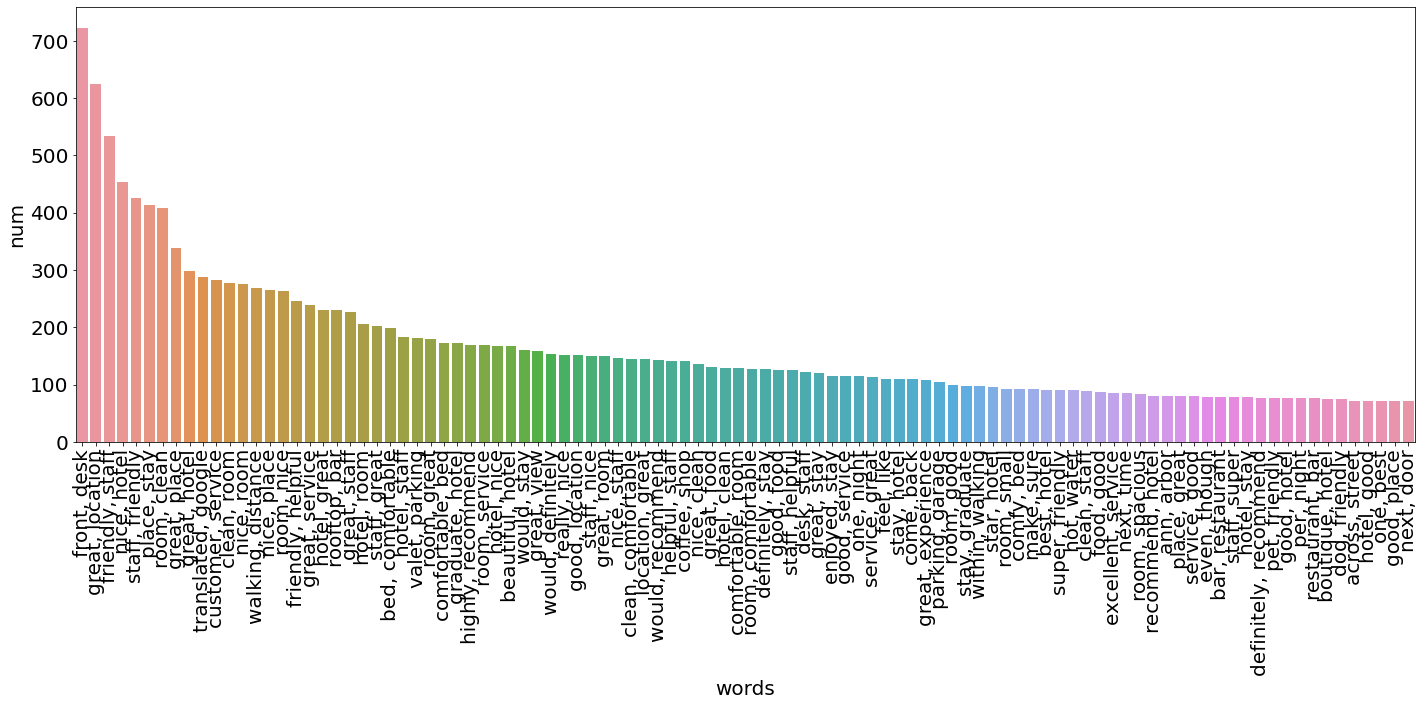

In [ ]:
plt.figure(figsize=[24, 8])
sns.barplot(data=concat.head(100), x='words', y='num')
plt.xticks(rotation=90)

In [ ]:
our_list = []
for i in range(len(concat)):
  our_list.append({concat.iloc[i, 0], concat.iloc[i, 1]})

In [ ]:
pd.DataFrame(our_list)

,0,1
0,front,desk
1,great,location
2,staff,friendly
3,nice,hotel
4,staff,friendly
...,...,...
132511,son,give
132512,give,shout
132513,shot,give
132514,give,service


In [ ]:
concat['set'] = our_list
concat.head()

,word1,word2,num,words,set
0,front,desk,723,"front, desk","{front, desk}"
1,great,location,625,"great, location","{great, location}"
2,friendly,staff,533,"friendly, staff","{staff, friendly}"
3,nice,hotel,453,"nice, hotel","{nice, hotel}"
4,staff,friendly,426,"staff, friendly","{staff, friendly}"


In [ ]:
# concat['set'].value_counts()

In [ ]:
# concat.duplicated(subset=['set'])

In [ ]:
concat['set'] = concat['set'].apply(frozenset)

In [ ]:
setgraph = concat.groupby('set').sum().reset_index().sort_values('num', ascending=False)

In [ ]:
setgraph['setlist'] = setgraph['set'].apply(lambda x: ' '.join(list(x)))

In [ ]:
setgraph

,set,num,setlist
81304,"(staff, friendly)",959,staff friendly
81305,"(great, location)",769,great location
0,"(front, desk)",725,front desk
81301,"(clean, room)",685,clean room
81303,"(nice, hotel)",621,nice hotel
...,...,...,...
40796,"(ginger, get)",1,ginger get
40795,"(furniture, get)",1,furniture get
40794,"(frown, get)",1,frown get
40793,"(friday, get)",1,friday get


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

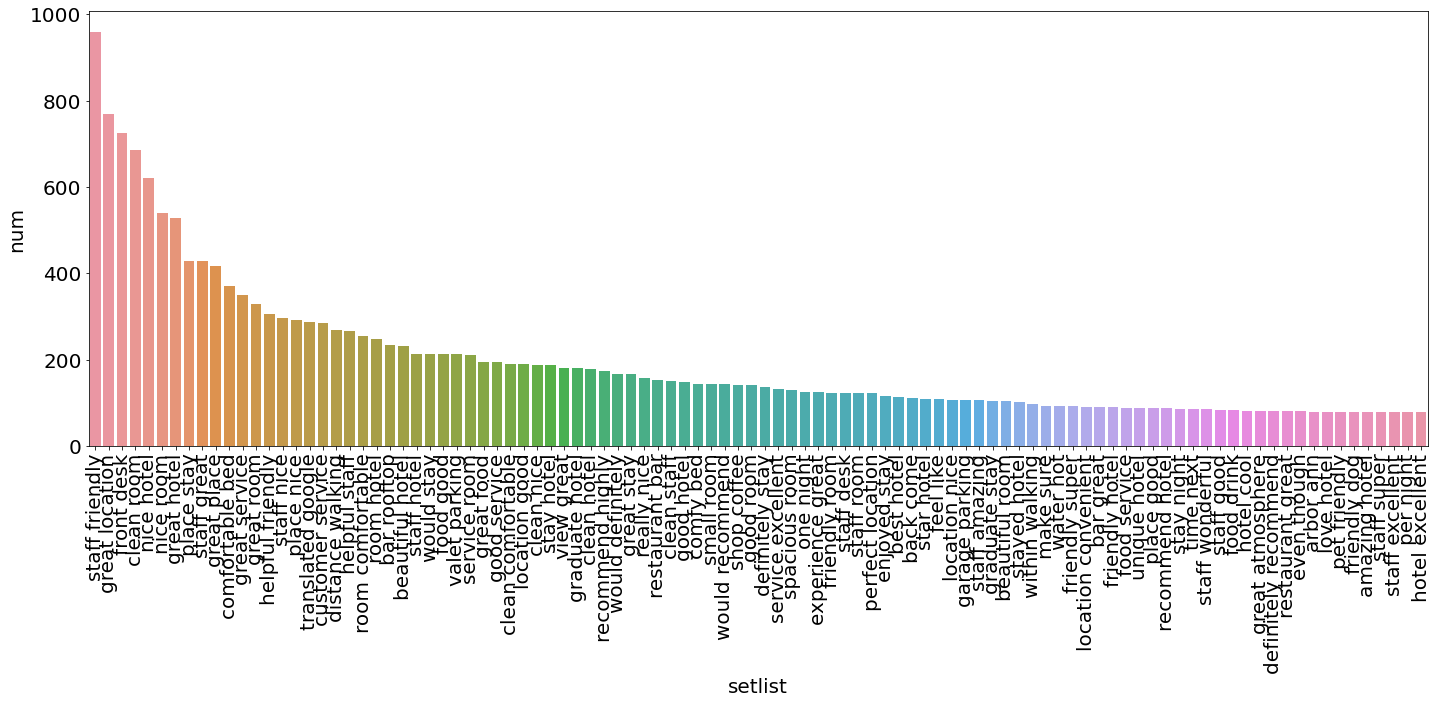

In [ ]:
plt.figure(figsize=[24, 8])
sns.barplot(data=setgraph.head(100), x='setlist', y='num')
plt.xticks(rotation=90)

In [ ]:
setgraph['setlist'].head(100).to_list()

['staff friendly',
 'great location',
 'front desk',
 'clean room',
 'nice hotel',
 'nice room',
 'great hotel',
 'place stay',
 'staff great',
 'great place',
 'comfortable bed',
 'great service',
 'great room',
 'helpful friendly',
 'staff nice',
 'place nice',
 'translated google',
 'customer service',
 'distance walking',
 'helpful staff',
 'room comfortable',
 'room hotel',
 'bar rooftop',
 'beautiful hotel',
 'staff hotel',
 'would stay',
 'food good',
 'valet parking',
 'service room',
 'great food',
 'good service',
 'clean comfortable',
 'location good',
 'clean nice',
 'stay hotel',
 'view great',
 'graduate hotel',
 'clean hotel',
 'recommend highly',
 'would definitely',
 'great stay',
 'really nice',
 'restaurant bar',
 'clean staff',
 'good hotel',
 'comfy bed',
 'small room',
 'would recommend',
 'shop coffee',
 'good room',
 'definitely stay',
 'service excellent',
 'spacious room',
 'one night',
 'experience great',
 'friendly room',
 'staff desk',
 'staff room',
 'per

In [ ]:
def bigram_finder(df):
  df = df[df['lemmatized'].str.len() != 0]
  t = list(df['lemmatized'].apply(bigrams).apply(list))
  flat_list = [item for sublist in t for item in sublist]
  
  bigramdf = pd.DataFrame()
  
  indices = pd.DataFrame(flat_list).value_counts().index.to_list()
  indices_df = pd.DataFrame(indices)
  values_df = pd.DataFrame(pd.DataFrame(flat_list).value_counts().values)
  concat = pd.concat([indices_df, values_df], axis=1)

  concat.columns = ['word1', 'word2', 'num']
  
  our_list = []
  for i in range(len(concat)):
    our_list.append({concat.iloc[i, 0], concat.iloc[i, 1]})
  
  concat['set'] = our_list
  
  concat['set'] = concat['set'].apply(frozenset)

  output = concat.groupby('set').sum().reset_index().sort_values('num', ascending=False)
  output['set_words'] = output['set'].apply(lambda x: ' '.join(list(x)))

  return output

In [ ]:
reviews2[(reviews2['hotel'] == 'Graduate Roosevelt Island') & (reviews2['rating'] == 1)]

,hotel,name,time,rating,site,trip type,room rating,location rating,service rating,text,hotel reply,reply date,stripped,C_Score,ratingInt,Sentiment,text2,tokenized,lemmatized


In [ ]:
bigram_finder(reviews2[(reviews2['hotel'] == 'Graduate Providence') & (reviews2['ratingInt'] <= 3)])

,set,num,set_words
0,"(front, desk)",33,front desk
3909,"(star, hotel)",11,star hotel
3908,"(historic, hotel)",10,historic hotel
3907,"(room, hotel)",10,room hotel
3906,"(service, room)",9,service room
...,...,...,...
1960,"(god, google)",1,god google
1959,"(wrong, go)",1,wrong go
1958,"(valet, go)",1,valet go
1957,"(unacceptable, go)",1,unacceptable go


In [ ]:
reviews2[(reviews2['hotel'] == 'Graduate Providence') & (reviews2['ratingInt'] <= 3)]

,hotel,name,time,rating,site,trip type,room rating,location rating,service rating,text,hotel reply,reply date,stripped,C_Score,ratingInt,Sentiment,text2,tokenized,lemmatized
16293,Graduate Providence,al lee,2 weeks ago,1/5,Google,Vacation,2.0,3.0,1.0,"Shocked this hotel is so highly rated. Maybe the history of the building has covered guests' eyes with rose-tinted glasses, but this hotel should not be rated a three star hotel, let alone a four star hotel. My heart sank a little bit as soon as I entered the hotel as the staff couldn't find my reservation. They later found it (and charged me twice for it), and things only got worse. The bathroom was very dirty (please do yourself a favor and don't rub any of the surfaces with a tissue), and the AC only worked sporadically throughout the night. There was an unfortunate incident where a lady screamed racist statements in the elevator and meaningfully stared at my room's number. I spoke to the front office hoping to get some action taken, but I received encouragement to try to find the lady's room number. The last thing I wanted to do was confront some clearly unhinged woman going on racist tirades. I was hoping to at least get moved to a different floor so I didn't have to worry about this lady, but I guess management thought this was just another casual event. Speaks volumes about how you will be treated if something goes wrong! If this was the Hilton or Marriott I would guarantee they would do their best to make sure you felt safe and supported. As far as the pros... Their shampoo/conditioner is actually pretty nice and I loved that the TVs are adjustable. I also definitely appreciated the historic nature of the building and the overall architecture, but I'd do yourself a favor and step into the hotel lobby, admire the view, and book yourself a different hotel.","Thank you for your feedback, Al. We are extremely disappointed to hear about your experience at our hotel. Please note that we are extremely disheartened about your experience, and we were unable to address the comments for the other guest because we did not know who they were or where they were located. We welcome guests of all races, religions, countries of origin, genders and sexual orientation into our hotel. We also apologize for the billing error, and we are following up housekeeping regarding the cleanliness concerns. Scott A. Williams General Manager",6 days ago,"Shocked this hotel is so highly rated. Maybe the history of the building has covered guests' eyes with rose-tinted glasses, but this hotel should not be rated a three star hotel, let alone a four star hotel. My heart sank a little bit as soon as I entered the hotel as the staff couldn't find my reservation. They later found it (and charged me twice for it), and things only got worse. The bathroom was very dirty (please do yourself a favor and don't rub any of the surfaces with a tissue), and the AC only worked sporadically throughout the night. There was an unfortunate incident where a lady screamed racist statements in the elevator and meaningfully stared at my room's number. I spoke to the front office hoping to get some action taken, but I received encouragement to try to find the lady's room number. The last thing I wanted to do was confront some clearly unhinged woman going on racist tirades. I was hoping to at least get moved to a different floor so I didn't have to worry about this lady, but I guess management thought this was just another casual event. Speaks volumes about how you will be treated if something goes wrong! If this was the Hilton or Marriott I would guarantee they would do their best to make sure you felt safe and supported. As far as the pros... Their shampoo/conditioner is actually pretty nice and I loved that the TVs are adjustable. I also definitely appreciated the historic nature of the building and the overall architecture, but I'd do yourself a favor and step into the hotel lobby, admire the view, and book yourself a differe

In [ ]:
reviews2.groupby('hotel').mean('ratingInt').sort_values('ratingInt', ascending=False)

,room rating,location rating,service rating,C_Score,ratingInt
hotel,,,,,
Graduate New Haven,4.857143,5.000000,4.875000,0.843311,4.796875
Graduate Tucson,4.458333,4.375000,4.307692,0.725010,4.572727
"Graduate Columbia, S.C.",4.300000,4.800000,4.500000,0.684788,4.496350
Graduate Columbus,4.239130,4.604167,4.280000,0.696817,4.388298
Graduate Ann Arbor,4.060606,4.636364,4.093750,0.612856,4.355219
Graduate Bloomington,4.511628,4.863636,4.142857,0.649576,4.337778
Graduate Annapolis,4.060606,4.484848,3.787879,0.618945,4.329377
Graduate Storrs,5.000000,5.000000,4.200000,0.553205,4.318182
Graduate Chapel Hill,4.266667,4.600000,3.600000,0.614290,4.316327


In [ ]:
ratingDist = pd.DataFrame(reviews2[['hotel', 'ratingInt']].value_counts()).reset_index().sort_values(['hotel', 'ratingInt'])
ratingDist

,hotel,ratingInt,0
103,Graduate Ann Arbor,1,21
105,Graduate Ann Arbor,2,20
78,Graduate Ann Arbor,3,38
25,Graduate Ann Arbor,4,163
8,Graduate Ann Arbor,5,352
...,...,...,...
54,"The Randolph Hotel, by Graduate Hotels",1,56
86,"The Randolph Hotel, by Graduate Hotels",2,32
51,"The Randolph Hotel, by Graduate Hotels",3,63
35,"The Randolph Hotel, by Graduate Hotels",4,122


In [ ]:
totalRev = pd.DataFrame(reviews2[['hotel', 'ratingInt']].value_counts()).reset_index().groupby('hotel').sum().reset_index()
totalRev

,hotel,ratingInt,0
0,Graduate Ann Arbor,15,594
1,Graduate Annapolis,15,674
2,Graduate Athens,15,541
3,Graduate Berkeley,15,394
4,Graduate Bloomington,15,225
5,Graduate Cambridge,15,746
6,Graduate Chapel Hill,15,196
7,Graduate Charlottesville,15,473
8,Graduate Cincinnati,15,683
9,"Graduate Columbia, S.C.",15,137


In [ ]:
totalRev[totalRev['hotel'] == 'Graduate Ann Arbor'][0][0]

594

In [ ]:
ratingDist['hotel'].apply(lambda x: print(totalRev[totalRev['hotel'] == x][0].values[0]))

594
674
541
394
225
746
196
473
683
137
188
71
1009
220
191
281
418
710
299
1275
271
64
355
1124
707
114
272
76
22
565
110
556


103    None
105    None
78     None
25     None
8      None
       ... 
54     None
86     None
51     None
35     None
14     None
Name: hotel, Length: 156, dtype: object

In [ ]:
ratingDist['total'] = ratingDist['hotel'].apply(lambda x: totalRev[totalRev['hotel'] == x][0].values[0])
ratingDist

,hotel,ratingInt,0,total
103,Graduate Ann Arbor,1,21,594
105,Graduate Ann Arbor,2,20,594
78,Graduate Ann Arbor,3,38,594
25,Graduate Ann Arbor,4,163,594
8,Graduate Ann Arbor,5,352,594
...,...,...,...,...
54,"The Randolph Hotel, by Graduate Hotels",1,56,556
86,"The Randolph Hotel, by Graduate Hotels",2,32,556
51,"The Randolph Hotel, by Graduate Hotels",3,63,556
35,"The Randolph Hotel, by Graduate Hotels",4,122,556


In [ ]:
ratingDist['total'] = ratingDist['total'].astype(int)

In [ ]:
ratingDist['per'] = ratingDist[0]/ratingDist['total']*100

In [ ]:
ratingDist

,hotel,ratingInt,0,total,prop,per
103,Graduate Ann Arbor,1,21,594,0.035354,3.535354
105,Graduate Ann Arbor,2,20,594,0.033670,3.367003
78,Graduate Ann Arbor,3,38,594,0.063973,6.397306
25,Graduate Ann Arbor,4,163,594,0.274411,27.441077
8,Graduate Ann Arbor,5,352,594,0.592593,59.259259
...,...,...,...,...,...,...
54,"The Randolph Hotel, by Graduate Hotels",1,56,556,0.100719,10.071942
86,"The Randolph Hotel, by Graduate Hotels",2,32,556,0.057554,5.755396
51,"The Randolph Hotel, by Graduate Hotels",3,63,556,0.113309,11.330935
35,"The Randolph Hotel, by Graduate Hotels",4,122,556,0.219424,21.942446


In [ ]:
ratingDist[ratingDist['ratingInt'] >= 4].groupby('hotel')[['hotel', 'per']].sum('per').sort_values('per', ascending=False).reset_index()

,hotel,per
0,Graduate New Haven,96.875000
1,Graduate Storrs,90.909091
2,"Graduate Columbia, S.C.",89.051095
3,Graduate Tucson,87.272727
4,Graduate Ann Arbor,86.700337
5,Graduate Minneapolis,85.960784
6,Graduate Annapolis,85.756677
7,Graduate Chapel Hill,85.204082
8,Graduate Cincinnati,84.773060
9,Graduate Columbus,84.042553


In [ ]:
ratingDist[ratingDist['ratingInt'] <= 2].groupby('hotel').sum().sort_values('per', ascending=False)

,ratingInt,0,total,prop,per
hotel,,,,,
Graduate Roosevelt Island,3,24,228,0.210526,21.052632
Graduate Nashville,3,57,542,0.210332,21.033210
Graduate Seattle,3,51,544,0.187500,18.750000
Graduate Knoxville,3,70,836,0.167464,16.746411
Graduate Iowa City,3,46,562,0.163701,16.370107
"The Randolph Hotel, by Graduate Hotels",3,88,1112,0.158273,15.827338
Graduate Richmond,3,111,1414,0.157001,15.700141
Graduate Fayetteville,3,29,382,0.151832,15.183246
Graduate East Lansing,3,10,142,0.140845,14.084507


In [ ]:
ratingDist

,hotel,ratingInt,0,total,prop,per
103,Graduate Ann Arbor,1,21,594,0.035354,3.535354
105,Graduate Ann Arbor,2,20,594,0.033670,3.367003
78,Graduate Ann Arbor,3,38,594,0.063973,6.397306
25,Graduate Ann Arbor,4,163,594,0.274411,27.441077
8,Graduate Ann Arbor,5,352,594,0.592593,59.259259
...,...,...,...,...,...,...
54,"The Randolph Hotel, by Graduate Hotels",1,56,556,0.100719,10.071942
86,"The Randolph Hotel, by Graduate Hotels",2,32,556,0.057554,5.755396
51,"The Randolph Hotel, by Graduate Hotels",3,63,556,0.113309,11.330935
35,"The Randolph Hotel, by Graduate Hotels",4,122,556,0.219424,21.942446


In [ ]:
alt.Chart(ratingDist[['hotel', 'ratingInt', 'per']]).mark_rect().encode(
    x=alt.X('hotel:N', title='Hotel'),
    y=alt.Y('ratingInt:O', sort='-y', title='Rating out of 5'),
    color=alt.Color('per:Q', scale=alt.Scale(scheme="teals"), title='%')
).properties(
    title='Percent distribution of rating by hotel'
)

alt.Chart(...)

In [ ]:
score = ratingDist[ratingDist['ratingInt'] >= 4].groupby('hotel')[['hotel', 'per']].sum('per').sort_values('per', ascending=False).reset_index()

In [ ]:
score.head()

,hotel,per
0,Graduate New Haven,96.875000
1,Graduate Storrs,90.909091
2,"Graduate Columbia, S.C.",89.051095
3,Graduate Tucson,87.272727
4,Graduate Ann Arbor,86.700337


In [ ]:
alt.Chart(score).mark_bar().encode(
    x=alt.X('hotel:N', sort='-y', title='Hotel'),
    y=alt.Y('per:Q', title='Percentage of 4 & 5 Star Reviews'),
    color=alt.Color('per:Q', scale=alt.Scale(scheme='teals'), title='%')
).properties(
    title='Ranked: Relative Percent of 4 & 5 Star Reviews'
)

alt.Chart(...)

In [ ]:
bad_score = ratingDist[ratingDist['ratingInt'] <= 2].groupby('hotel')[['hotel', 'per']].sum('per').sort_values('per', ascending=False).reset_index()

In [ ]:
alt.Chart(bad_score).mark_bar().encode(
    x=alt.X('hotel:N', sort='y', title='Hotel'),
    y=alt.Y('per:Q', title='Percentage of 1 & 2 Star Reviews'),
    color=alt.Color('per:Q', scale=alt.Scale(scheme='orangered'), title='%')
).properties(
    title='Ranked: Relative Percent of 1 & 2 Star Reviews'
)

alt.Chart(...)

In [ ]:
# choose which bigrams to get
# by branch, specifically, show a few from each branch

In [ ]:
def graph_bigram(df, num, title, color): 
  plot = alt.Chart(df.head(num)).mark_bar().encode(
            x=alt.X('set_words:N', sort='-y', title='Word bigrams'),
            y=alt.Y('num:Q', title='Number of Reviews'),
            color=alt.Color('num:Q', scale=alt.Scale(scheme=color), title='#')
          ).properties(
            title=title
          )
  return plot

In [ ]:
new_haven = bigram_finder(reviews2[(reviews2['hotel'] == 'Graduate New Haven')])[['num', 'set_words']]
graph_bigram(new_haven, 20, 'Bigrams of Graduate New Haven', 'teals')

alt.Chart(...)

In [ ]:
knoxville = bigram_finder(reviews2[(reviews2['hotel'] == 'Graduate Knoxville')])[['num', 'set_words']]
graph_bigram(knoxville, 20, 'Bigrams of Graduate Knoxville', 'orangered')

alt.Chart(...)

In [ ]:
knoxville_1 = bigram_finder(reviews2[(reviews2['hotel'] == 'Graduate Knoxville') & (reviews2['ratingInt'] == 1)])[['set_words', 'num']]
graph_bigram(knoxville_1, 20, 'Bigrams of Graduate Knoxville 1 Star Reviews', 'orangered')

alt.Chart(...)

In [ ]:
columbia = bigram_finder(reviews2[(reviews2['hotel'] == 'Graduate Columbia, S.C.')])[['set_words', 'num']]
graph_bigram(columbia, 20, 'Bigrams of Graduate Columbia, S.C.', 'teals')

alt.Chart(...)

In [ ]:
roosevelt = bigram_finder(reviews2[(reviews2['hotel'] == 'Graduate Roosevelt Island')])[['set_words', 'num']]
graph_bigram(roosevelt, 20, 'Bigrams of Graduate Roosevelt Island', 'orangered')

alt.Chart(...)

In [ ]:
bigram_finder(reviews2[(reviews2['ratingInt'] >= 5)])

,set,num,set_words
34286,"(staff, friendly)",603,staff friendly
0,"(great, location)",479,great location
34290,"(clean, room)",407,clean room
34292,"(great, hotel)",372,great hotel
34294,"(staff, great)",312,staff great
...,...,...,...
17202,"(ganjacon, facility)",1,ganjacon facility
17203,"(game, life)",1,game life
17204,"(gammage, theatre)",1,gammage theatre
17205,"(gammage, open)",1,gammage open


In [ ]:
four_five = bigram_finder(reviews2[(reviews2['ratingInt'] >= 4)])[['set_words', 'num']]
graph_bigram(four_five, 20, 'Bigrams of 4 & 5 Star Reviews', 'teals')

alt.Chart(...)

In [ ]:
bigram_finder(reviews2[(reviews2['ratingInt'] <= 2)])

,set,num,set_words
0,"(front, desk)",289,front desk
28969,"(customer, service)",84,customer service
28970,"(star, hotel)",66,star hotel
28973,"(room, hotel)",61,room hotel
28979,"(small, room)",55,small room
...,...,...,...
14642,"(nearby, good)",1,nearby good
14643,"(going, watch)",1,going watch
14644,"(going, walked)",1,going walked
14645,"(cater, going)",1,cater going


In [ ]:
one = bigram_finder(reviews2[(reviews2['ratingInt'] == 1)])[['set_words', 'num']]
graph_bigram(one, 18, 'Bigrams of 1 Star Reviews', 'orangered')

alt.Chart(...)

In [ ]:
overall_dist = ratingDist[['ratingInt', 0]].groupby('ratingInt').sum().reset_index()
overall_dist.columns = ['ratingInt', 'num']

In [ ]:
overall_dist.columns

Index(['ratingInt', 'num'], dtype='object')

In [ ]:
alt.Chart(overall_dist).mark_bar().encode(
    x=alt.X('ratingInt:O', sort='-x', title='Rating'),
    y=alt.Y('num:Q', title='Number of Reviews'),
    color=alt.Color('num:Q', scale=alt.Scale(scheme='teals'), title='#')
).properties(
    title='Distribution of Graduate Hotels Google Ratings'
)

alt.Chart(...)